### Visualises/plots time series for node pressures, water velocity and water flow.
 
This example contains:
* Load a network.
* Hydraulic analysis using ENepanet binary file.
* Change time-stamps from seconds to hours.
* Plot node pressures for specific nodes.
* Plot water velocity for specific links.
* Plot water flow for specific links.
* Unload library.



In [1]:
from epyt import epanet

# Load a network
d = epanet('Net1.inp')

EPANET version 20200 loaded (EPyT version 1.0.5).
Input File Net1.inp loaded successfully.



In [2]:
# Run hydraulic analysis of a network
# Hydraulic analysis using binary file
# (This function ignore events)
hyd_res = d.getComputedTimeSeries()
print(f" Attributes calculated in  hydraulic analysis:  {list(hyd_res.to_dict().keys())}")
# Change time-stamps from seconds to hours
hrs_time = hyd_res.Time/3600

 Attributes calculated in  hydraulic analysis:  ['Time', 'Pressure', 'Demand', 'Head', 'NodeQuality', 'Flow', 'Velocity', 'HeadLoss', 'Status', 'Setting', 'ReactionRate', 'FrictionFactor', 'LinkQuality', 'StatusStr']


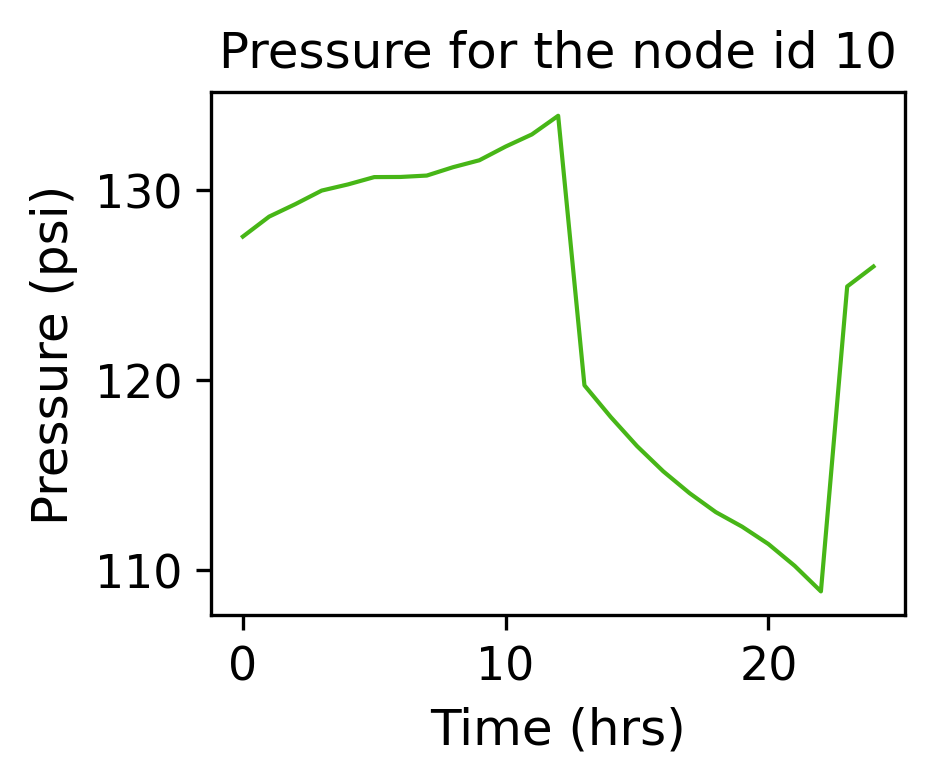

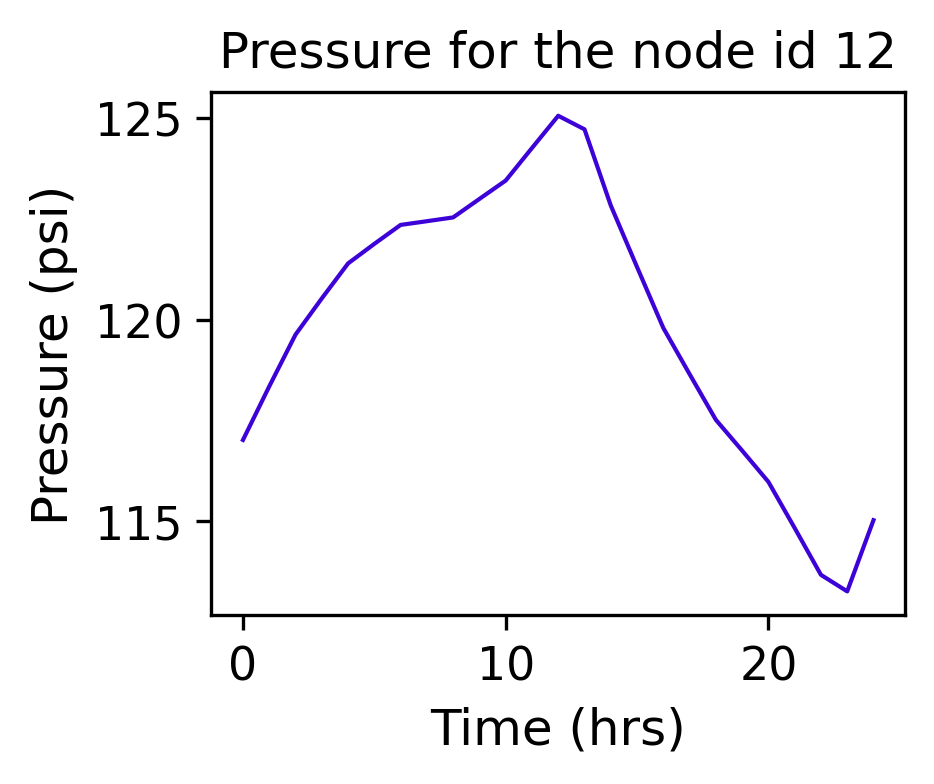

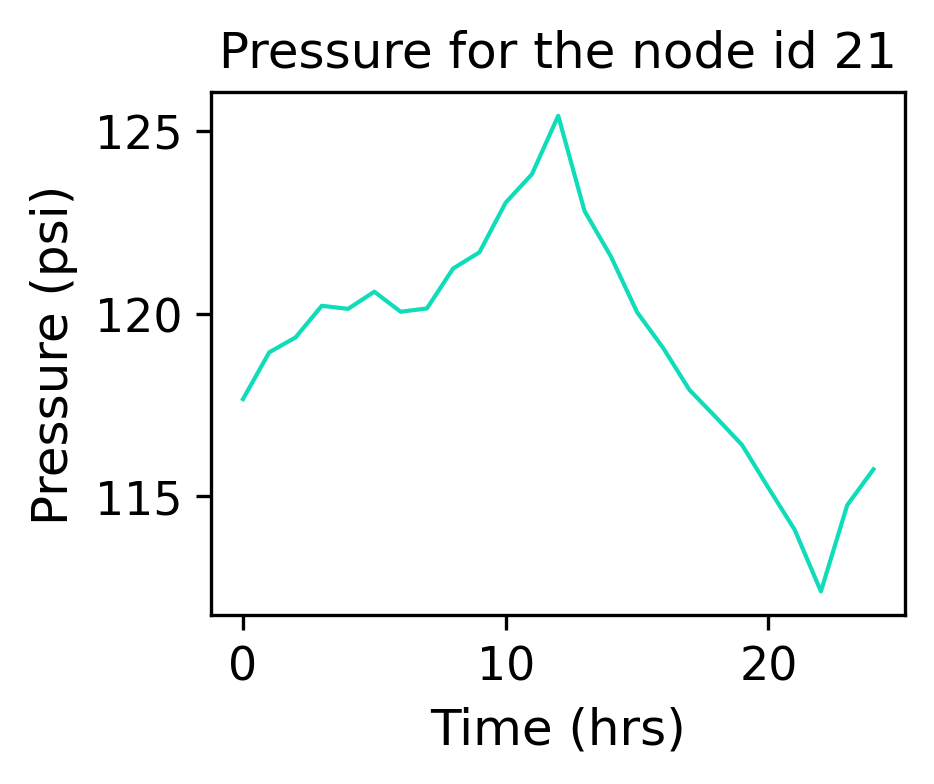

In [3]:
# Plot node pressures for specific nodes 
node_indices = [1, 3, 5]
node_names = d.getNodeNameID(node_indices)
for index in node_indices:
    d.plot_ts(X=hrs_time, Y=hyd_res.Pressure[:, index - 1],
              title=f'Pressure for the node id {d.getNodeNameID(index)}',
              xlabel='Time (hrs)', ylabel=f'Pressure ({d.units.NodePressureUnits})',
              marker=None)

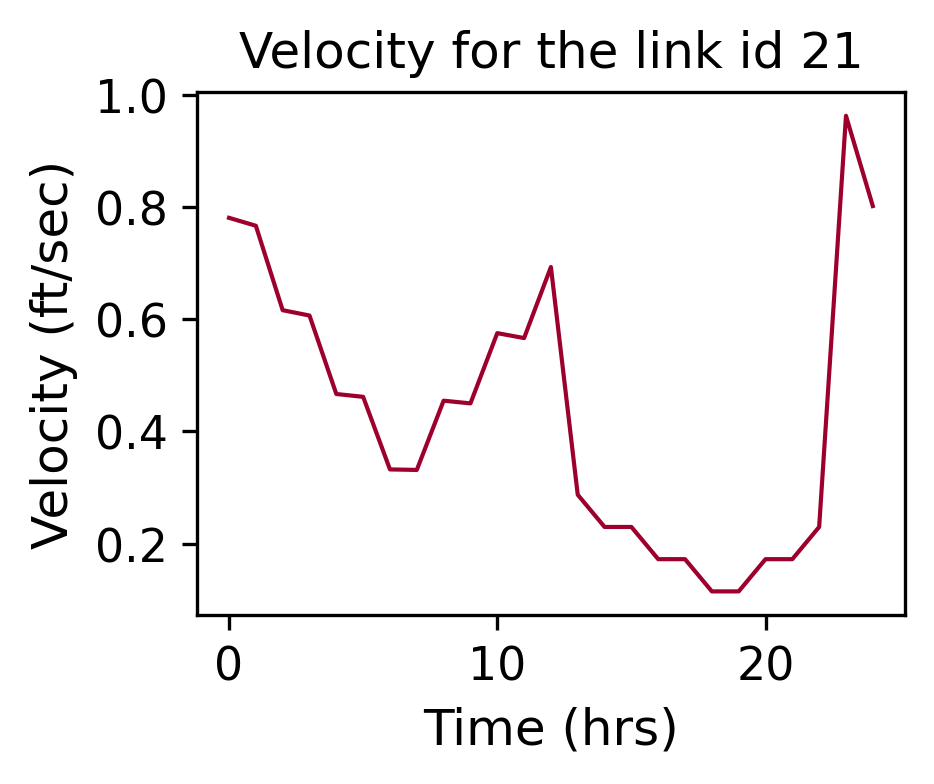

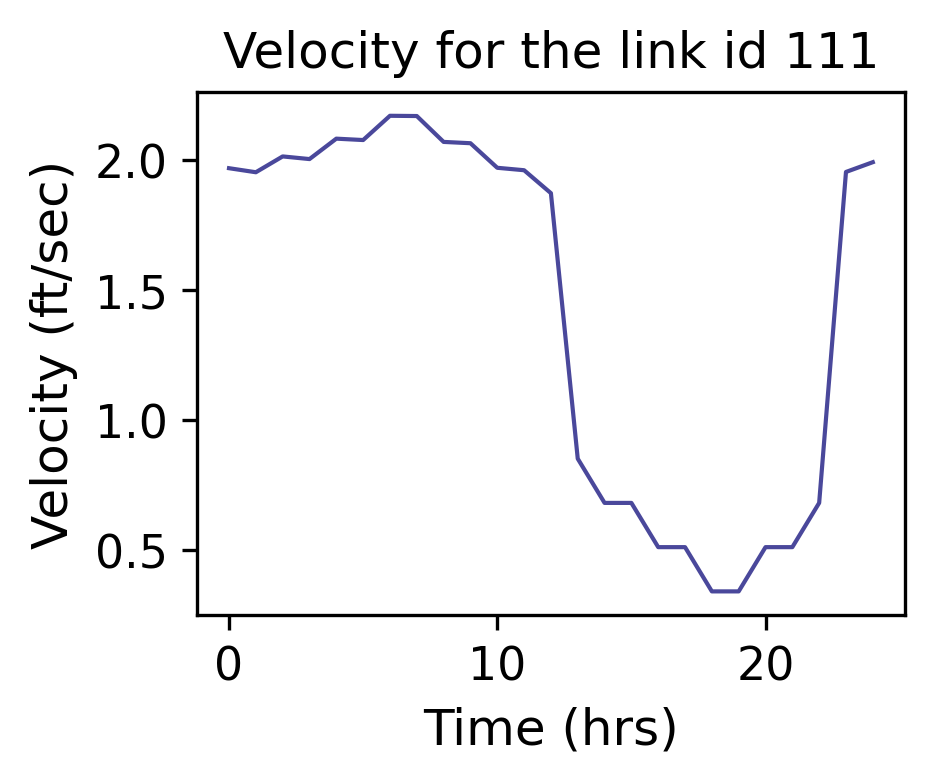

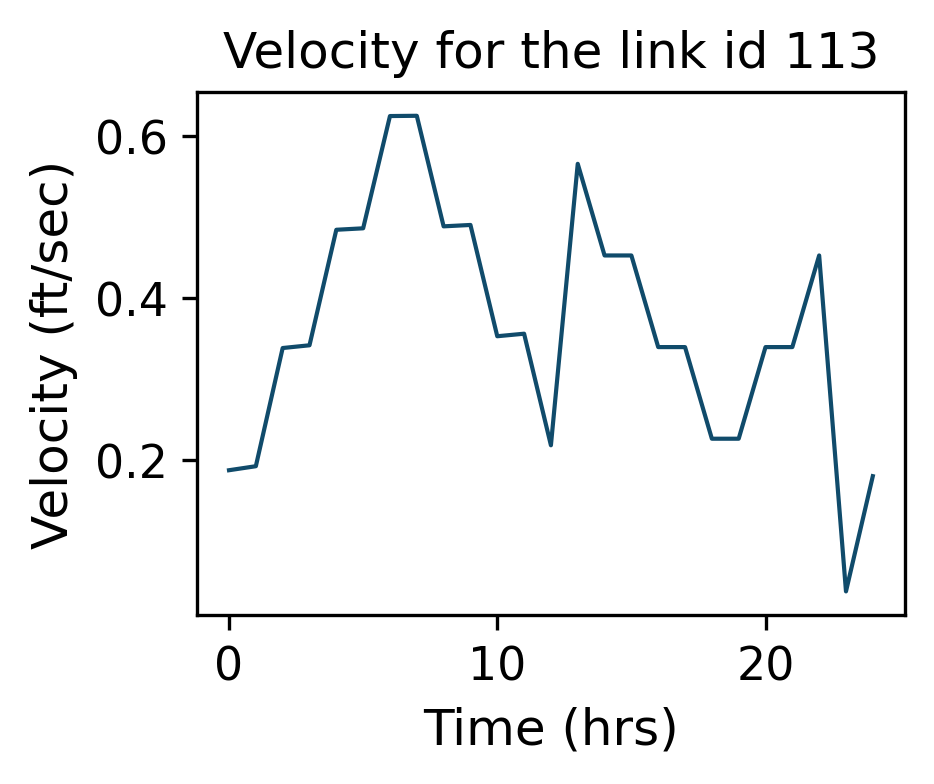

In [4]:
# Plot water velocity for specific links
link_indices = [4, 8, 10]
link_names = d.getNodeNameID(link_indices)
for index in link_indices:
    d.plot_ts(X=hrs_time, Y=hyd_res.Velocity[:, index - 1],
              title=f'Velocity for the link id {d.getLinkNameID(index)}',
              xlabel='Time (hrs)', ylabel=f'Velocity ({d.units.LinkVelocityUnits})',
              marker=None)

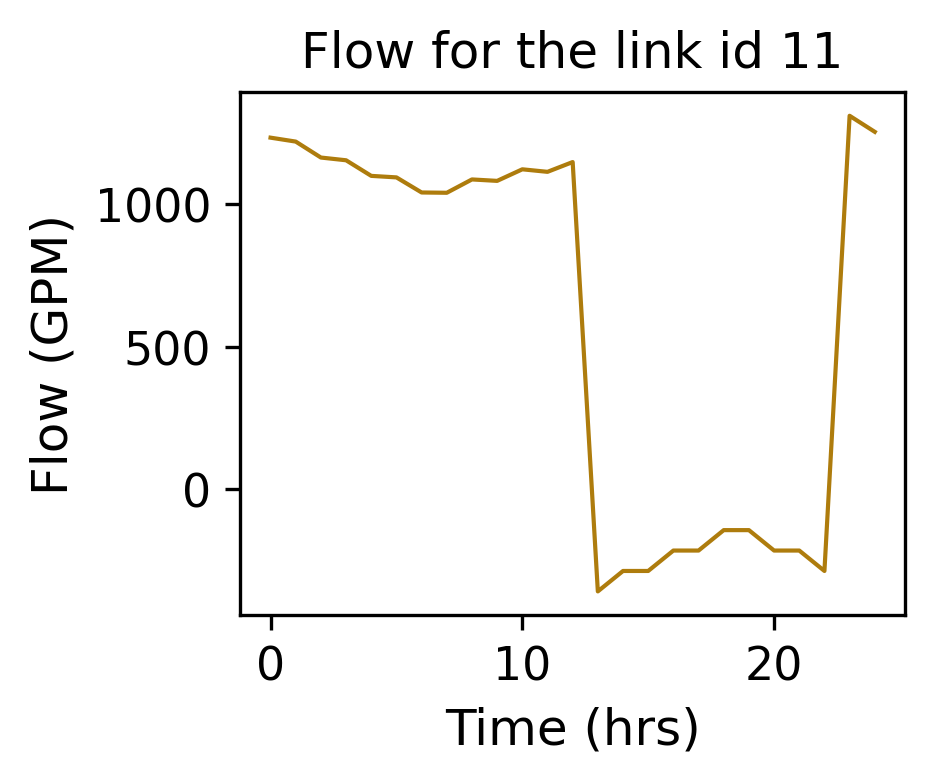

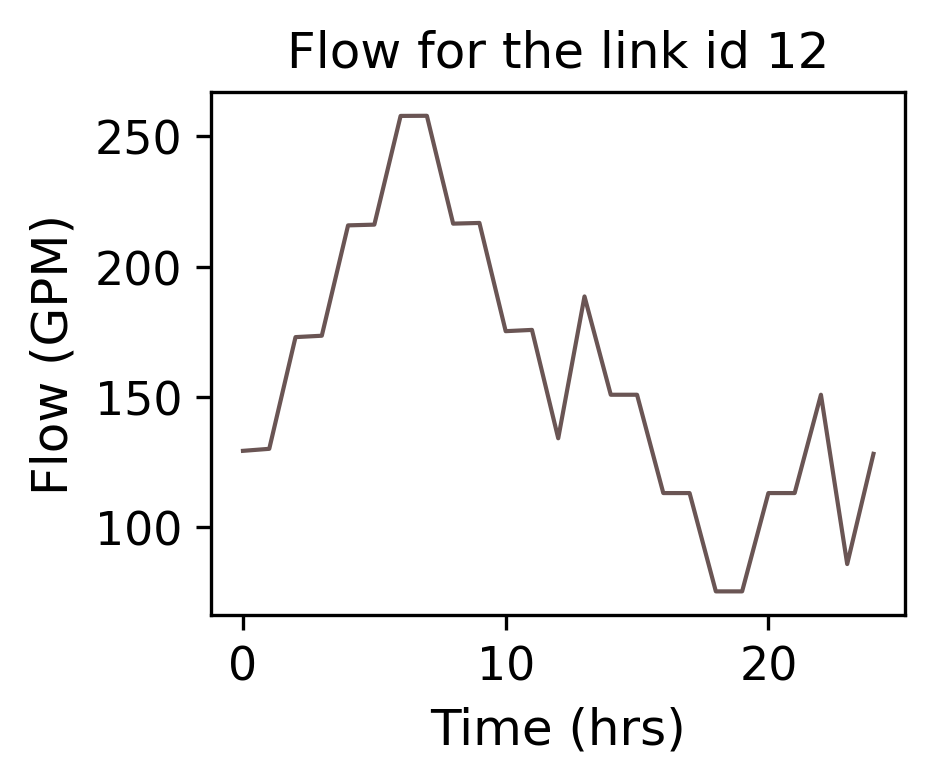

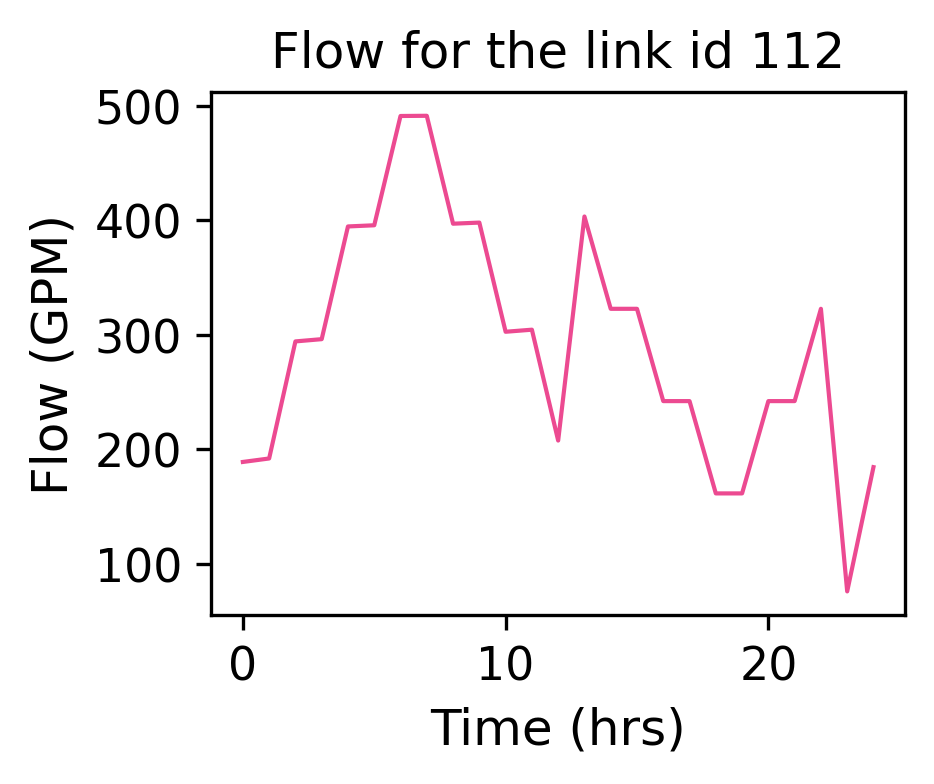

In [5]:
# Plot water flow for specific links
link_indices = [2, 3, 9]
for index in link_indices:
    d.plot_ts(X=hrs_time, Y=hyd_res.Flow[:, index - 1],
              title=f'Flow for the link id {d.getLinkNameID(index)}',
              xlabel='Time (hrs)', ylabel=f'Flow ({d.units.LinkFlowUnits})',
              marker=None)

In [6]:
# Unload library
d.unload()

Close toolkit for the input file "Net1". EPANET Toolkit is unloaded.

